In [2]:
print("Hello world")

Hello world


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
import os
print("Current Dir",os.getcwd())
curr_dir =os.getcwd()
train_path=os.path.join(curr_dir,"datasets","Train")
test_path=os.path.join(curr_dir,"datasets","Test")
valid_path=os.path.join(curr_dir,"datasets","valid")
print(train_path) 
print(test_path)
print(valid_path)

Current Dir c:\Users\HP\OneDrive\Documents\potato disease project
c:\Users\HP\OneDrive\Documents\potato disease project\datasets\Train
c:\Users\HP\OneDrive\Documents\potato disease project\datasets\Test
c:\Users\HP\OneDrive\Documents\potato disease project\datasets\valid


In [5]:
training_set=tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
     interpolation="bilinear" 
    )

Found 900 files belonging to 3 classes.


In [6]:
testing_set=tf.keras.utils.image_dataset_from_directory(
    test_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
     interpolation="bilinear" 
    )

Found 300 files belonging to 3 classes.


In [7]:
testing_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
     interpolation="bilinear" 
    )

Found 300 files belonging to 3 classes.


In [10]:

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))




cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))



cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu',input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
                            


cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))




cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorial_crossentropy',metrics=['accuracy'])


In [18]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)


Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 683ms/step - accuracy: 0.3401 - loss: 3.0834 - val_accuracy: 0.3333 - val_loss: 1.1040
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 678ms/step - accuracy: 0.3524 - loss: 1.1017 - val_accuracy: 0.3367 - val_loss: 1.0885
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 724ms/step - accuracy: 0.3585 - loss: 1.0984 - val_accuracy: 0.3333 - val_loss: 1.0985
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 725ms/step - accuracy: 0.3572 - loss: 1.0977 - val_accuracy: 0.3400 - val_loss: 1.0936
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 728ms/step - accuracy: 0.3061 - loss: 1.1023 - val_accuracy: 0.3333 - val_loss: 1.0978
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 789ms/step - accuracy: 0.3567 - loss: 1.0970 - val_accuracy: 0.4233 - val_loss: 1.0936
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 797ms/step - accuracy: 0.4304 - loss: 1.0882 - val_accuracy: 0.4033 - val_loss: 1.0551
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 759ms/step - accuracy: 0.4062 - loss: 1.0675 - val_accu

In [ ]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:',train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 225ms/step - accuracy: 0.3608 - loss: 1.0885
Training accuracy: 0.3355555534362793


In [ ]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('validation accuracy:',val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 0.3616 - loss: 1.0897
validation accuracy: 0.3333333432674408


In [ ]:
cnn.save('trained_plant_disease_model.keras')


In [ ]:
training_history.history


{'accuracy': [0.33222222328186035,
  0.33666667342185974,
  0.3355555534362793,
  0.3566666543483734,
  0.3566666543483734,
  0.3655555546283722,
  0.3766666650772095,
  0.3422222137451172,
  0.347777783870697,
  0.3333333432674408],
 'loss': [2.7187249660491943,
  1.0974358320236206,
  1.0990755558013916,
  1.0953305959701538,
  1.0957244634628296,
  1.0952154397964478,
  1.1247425079345703,
  1.1026356220245361,
  1.0977073907852173,
  1.0942044258117676],
 'val_accuracy': [0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.4466666579246521,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408],
 'val_loss': [1.097978949546814,
  1.0907970666885376,
  1.1050446033477783,
  1.0857776403427124,
  1.1125147342681885,
  1.7710713148117065,
  1.1017518043518066,
  1.0887902975082397,
  1.0958223342895508,
  1.090236783027649]}

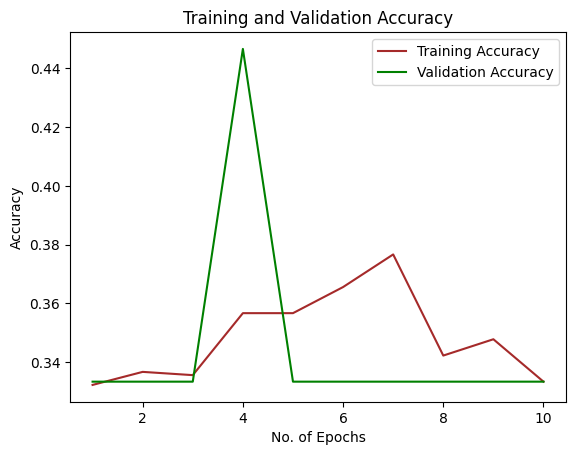

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'training_history' is the History object returned by cnn.fit
history = training_history.history

epochs = range(1, 11)
plt.plot(epochs, history['accuracy'], color='brown', label='Training Accuracy')
plt.plot(epochs, history['val_accuracy'], color='green', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()